In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn import metrics

In [51]:
count1 = 0
for i in range(10000):
    value = np.random.normal(0, 12, 1)[0]
    bound = 18
    if value < bound and value > -bound:
        count1 += 1

count2 = 0
for i in range(10000):
    bound = 90
    value = np.random.normal(0, 60, 1)[0]
    if value < bound and value > -bound:
        count2 += 1

count3 = 0
for i in range(10000):
    bound = 180
    value = np.random.normal(0, 120, 1)[0]
    if value < bound and value > -bound:
        count3 += 1
        
print(count1, count2, count3)

8681 8704 8644


Text(0.5, 0, 'hue')

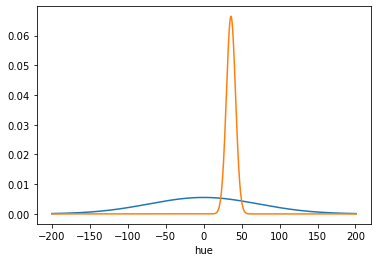

In [40]:
x = np.arange(-200,201,0.1)
G1 = norm.pdf(x, 0, 72)
G2 = norm.pdf(x, 36, 6)

plt.plot(x, G1)
plt.plot(x, G2)
plt.xlabel("hue")

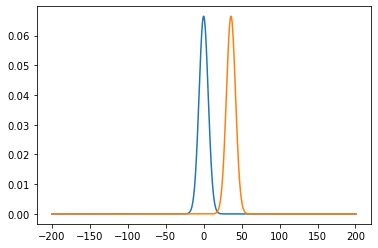

In [5]:
# Do everything above in a loop for sigma (note I increased the range of x here so I could try sigmas up to 50)
x = np.arange(-200,201,0.1)
n_x = x.size
mu1 = 0
mu2 = 36

all_sigmas = np.arange(6,78,6)
AUC = np.zeros(all_sigmas.size)
for m in range(all_sigmas.size):
    sigma = all_sigmas[m]
    G1 = norm.pdf(x, mu1, sigma)
    G2 = norm.pdf(x, mu2, sigma)

    factor = 10000
    G1 = np.round(G1*factor).astype(int)
    G2 = np.round(G2*factor).astype(int)

    # get samples
    s1 = []
    for i in range(n_x):
        if G1[i] != 0:
            s1 += G1[i] * [np.round(x[i],decimals=3)]

    s2 = []
    for i in range(n_x):
        if G2[i] != 0:
            s2 += G2[i] * [np.round(x[i],decimals=3)]

    s1 = np.array(s1)
    s2 = np.array(s2)

    N_samples1 = s1.size
    N_samples2 = s2.size
    y_score = np.concatenate((s1, s2))
    y_true = np.concatenate((np.zeros(N_samples1), np.ones(N_samples2))).astype(int)

    AUC[m] = metrics.roc_auc_score(y_true, y_score)

# plt.plot(all_sigmas, AUC)
# plt.ylabel('AUC')
# plt.xlabel('sigma')

In [ ]:
print(AUC[np.where(all_sigmas == 72)[0][0]])

In [ ]:
# Do everything above in a loop for sigma (note I increased the range of x here so I could try sigmas up to 50)
x = np.arange(-400,401,0.1)
n_x = x.size

all_mus = [36 * i for i in range(10)]

all_sigmas = np.arange(6,72,6)
AUC = np.zeros(all_sigmas.size)
for m in range(all_sigmas.size):
    sigma = all_sigmas[m]
    all_Gs = [norm.pdf(x, all_mus[i], sigma) for i in range(10)]

    factor = 10000
    for i in range(len(all_Gs)):
        all_Gs[i] = np.round(all_Gs[i]*factor).astype(int)

    # get samples
    s1 = []
    for i in range(n_x):
        if all_Gs[4][i] != 0:
            s1 += all_Gs[4][i] * [np.round(x[i],decimals=3)]

    s2 = []
    for j in range(4):
        for i in range(n_x):
            if all_Gs[j][i] != 0:
                s2 += all_Gs[j][i] * [np.round(x[i],decimals=3)]
    s3 = []
    for j in range(5, len(all_Gs), 1):
        for i in range(n_x):
            if all_Gs[j][i] != 0:
                s3 += all_Gs[j][i] * [np.round(x[i],decimals=3)]

    s1 = np.array(s1)
    s2 = np.array(s2)
    s3 = np.array(s3)

    N_samples1 = s1.size
    N_samples2 = s2.size
    N_samples3 = s3.size
    y_score = np.concatenate((s2, s1, s3))
    y_true = np.concatenate((np.ones(N_samples2), np.zeros(N_samples1), np.ones(N_samples3))).astype(int)

    AUC[m] = metrics.roc_auc_score(y_true, y_score)

print(AUC)    
plt.plot(all_sigmas, AUC)
plt.ylabel('AUC')
plt.xlabel('sigma')

In [ ]:
for i in range(len(all_Gs)):
    plt.plot(x, all_Gs[i]/factor, '--')
    # plt.plot(x, all_Gs[5]/factor, '--')
print(all_mus)

In [ ]:
# Do everything above in a loop for mu
x=np.arange(-100,101,0.1)
n_x=x.size
sigma=5

mu1=0
all_mus=np.arange(0,26)
AUC=np.zeros(all_mus.size)
for m in range(all_mus.size):
    mu2=all_mus[m]
    G1=np.exp((-(x-mu1)**2)/2/sigma**2)/sigma/np.sqrt(2*np.pi)
    G2=np.exp((-(x-mu2)**2)/2/sigma**2)/sigma/np.sqrt(2*np.pi)

    factor=10000
    G1=np.round(G1*factor).astype(int)
    G2=np.round(G2*factor).astype(int)

    # get samples
    s1=[]
    for i in range(n_x):
        if G1[i]!=0:
            s1 += G1[i] * [np.round(x[i],decimals=3)]

    s2=[]
    for i in range(n_x):
        if G2[i]!=0:
            s2 += G2[i] * [np.round(x[i],decimals=3)]

    s1=np.array(s1)
    s2=np.array(s2)

    N_samples1=s1.size
    N_samples2=s2.size
    y_score=np.concatenate((s1,s2))
    y_true=np.concatenate((np.zeros(N_samples1),np.ones(N_samples2))).astype(int)

    AUC[m]=metrics.roc_auc_score(y_true, y_score)

plt.plot(all_mus,AUC)
plt.ylabel('AUC')
plt.xlabel('mu2')

In [ ]:
x = np.arange(-200,201,0.1)
n_x = x.size
sigma = 36

mu1 = 0
mu2 = 36
G1 = norm.pdf(x, mu1, sigma)
G2 = norm.pdf(x, mu2, sigma)
plt.plot(x,G1,x,G2)

factor = 10000
G1 = np.round(G1*factor).astype(int)
G2 = np.round(G2*factor).astype(int)
plt.plot(x, G2/factor, '--')
plt.plot(x, G1/factor, '--')

# get samples
s1 = []
for i in range(n_x):
    if G1[i]!=0:
        s1 += G1[i] * [np.round(x[i],decimals=3)]

s2 = []
for i in range(n_x):
    if G2[i]!=0:
        s2 += G2[i] * [np.round(x[i],decimals=3)]

s1 = np.array(s1)
s2 = np.array(s2)

N_samples1 = s1.size
N_samples2 = s2.size
y_score = np.concatenate((s1,s2))
y_true = np.concatenate((np.zeros(N_samples1),np.ones(N_samples2))).astype(int)

metrics.roc_auc_score(y_true, y_score)